In [2]:
# importar librerías

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
# -----------------------------------------------------------------------
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Ajusta el ancho de la consola para evitar truncamientos
# -----------------------------------------------------------------------
pd.set_option("display.width", 1000) 

# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import levene
from scipy.stats import chi2_contingency, ttest_ind


# Importar otras librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import csv

In [3]:
df_HR= pd.read_csv("Dataset_HR_final.csv")
df_HR.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes


In [4]:
df_HR_prueba = df_HR.copy()
df_HR_prueba.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.0,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.0,33,11,9,1971,19999.0,Yes


In [5]:
dicc_att={"Yes":1, "No":0}


df_HR_prueba["attrition"] = df_HR_prueba["attrition"].replace(dicc_att)
df_HR_prueba["remote_work"] = df_HR_prueba["remote_work"].replace(dicc_att)

In [6]:
df_HR_prueba.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,0,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.0,20,15,15,1972,19537.0,1
1,52,0,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.0,33,11,9,1971,19999.0,1


### Matriz de correlaciones


1. **Correlación Débil**:

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

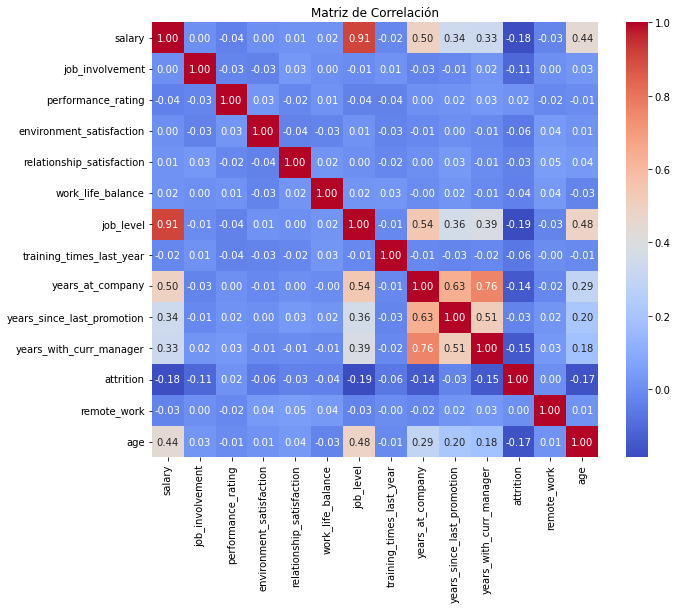

In [7]:
# FILTRAR COLUMNAS DE INTERÉS
columnas_interes=["salary","job_involvement","performance_rating","environment_satisfaction" ,"relationship_satisfaction" ,"work_life_balance",
    "job_level" ,
    "training_times_last_year",
    "years_at_company",
    "years_since_last_promotion",
    "years_with_curr_manager","attrition", "remote_work", "age"]
correlacion_matrix = df_HR_prueba[columnas_interes].corr()

# Visualizar la matriz de correlación con tamaño ajustado
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Se observan relaciones fuertes y positivas entre:
- job_level y salary (a mayor rango profesional, mayor salario).
- years_at_company y year_with_curr_manager (mientras mayor tiempo esté en la empresa, mayor tiempo estrá con el mismo manager).

Las relaciones moderadas positivas son:
- years_since_last_promotion con salary (Cuando hay una promoción, hay un aumento de salario).
- years_since_last_promotion con job_level (Si hay una promoción, hay un aumento en el rango profesional).
- years_since_last_promotion con years_at_company (Podría haber una relación en la que si a mayor años en la compañía, mayor posibilidad de promoción).

Tener en cuenta en el proceso de análisis:

- Aportar información al cliente sobre como `reducir la rotación de empleados y mejorar la satisfacción en el trabajo la empresa ABC Corporation`

- Recomendaciones para la empresa en función de los resultados encontrados con las gráficas

**Paula**
1. ¿Las personas que se van de la empresa están relacionadas con la edad?
2. ¿El tipo de rol influye entre el equilibiro de trabajo y vida personal?

**Andrea**

3. ¿Cantidad de trabajadores que hacen horas extras?- Determinar si en la cultura de trabajo de la empresa es trabajar muchas horas extras y si esto afecta la satisfacción del trabajador
   4. ¿ esto tiene una relación con el nivel de satisfacción del empleado?

9. ¿ cuantas personas han tenido alguna promoción de su puesto actual? years_since_last_promotion

**Maria**

5. Relación entre nivel job_satisfaction con work_life_balance

6. Relación entre training_times_last_year con job_satisfaction

7. relacion entre salary y nivel job_satisfactio

8. Relación entre remote_work y  work_life_balance



In [8]:
df_HR_prueba = df_HR.copy()
df_HR_prueba.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.0,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.0,33,11,9,1971,19999.0,Yes


**1. ¿Hay alguna relación entre la Edad y las Personas que se van de la Empresa?**

In [9]:
dicc_att={"Yes":1, "No":0}

df_HR_prueba["attrition"] = df_HR_prueba["attrition"].replace(dicc_att)

In [10]:
df_filtro = df_HR_prueba[df_HR_prueba["attrition"] == 1]

relacion = df_filtro.groupby("age").count().reset_index()

relacion[["age","attrition"]].head()

,age,attrition
0,18,3
1,19,4
2,20,4
3,21,4
4,22,2


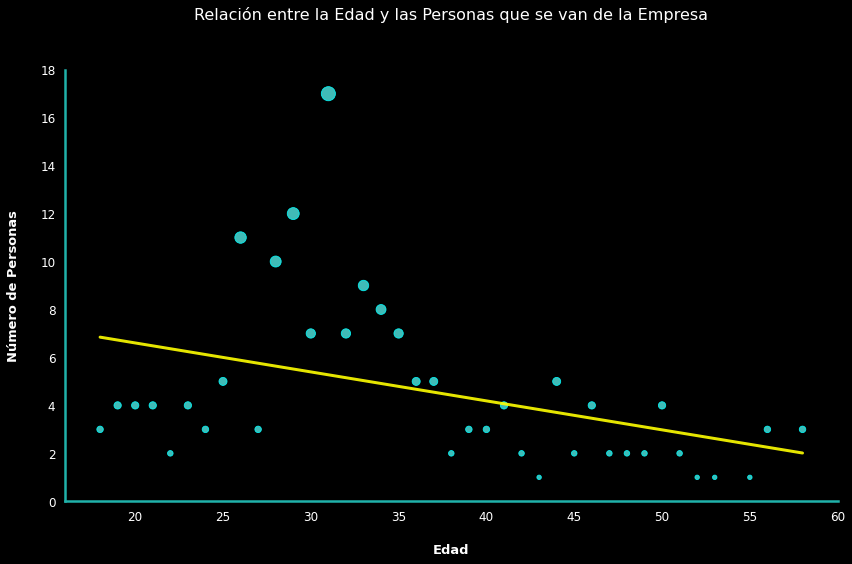

In [40]:
sns.set(style="darkgrid")


fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')

scatter = sns.scatterplot(
    x="age",
    y="attrition",
    size="attrition",
    sizes=(20, 200),
    color="mediumturquoise",
    alpha=0.9,
    edgecolor="aqua",
    linewidth=0.8,
    data=relacion,
    ax=ax,
    legend=False
)

sns.regplot(
    x='age',
    y='attrition',
    scatter=False,
    color='yellow',
    line_kws={"linewidth": 3, 'alpha': 0.9},
    ci=None,
    data=relacion,
    ax=ax
)

ax.set_xlabel("Edad", fontsize=13, color='white', weight='bold', labelpad=20)
ax.set_ylabel("Número de Personas", fontsize=13, color='white', weight='bold', labelpad=20)

ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

ax.set_yticks(ax.get_yticks())
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Relación entre la Edad y las Personas que se van de la Empresa', fontsize=16, color='white', pad=50)

plt.grid(False)

plt.tight_layout()
plt.show()


Se puede obervar que las personas que más se van de la empresa, son los que rondan entre los 20 a 30 años, y la cifra empieza a descender mientras mayor edad tienen los empleados.

**2. ¿El Rol Profesional influye en la Conciliación de la Vida Personal y Laboral**

In [45]:
df_rol_conciliacion = df_HR_prueba.groupby("job_role")["work_life_balance"].mean().reset_index()
roles_ordenados = df_rol_conciliacion.sort_values("work_life_balance", ascending=False)
roles_ordenados.head()

,job_role,work_life_balance
8,Sales Representative,2.952131
1,Human Resources,2.933514
5,Research Director,2.868000
7,Sales Executive,2.792667
3,Manager,2.764054


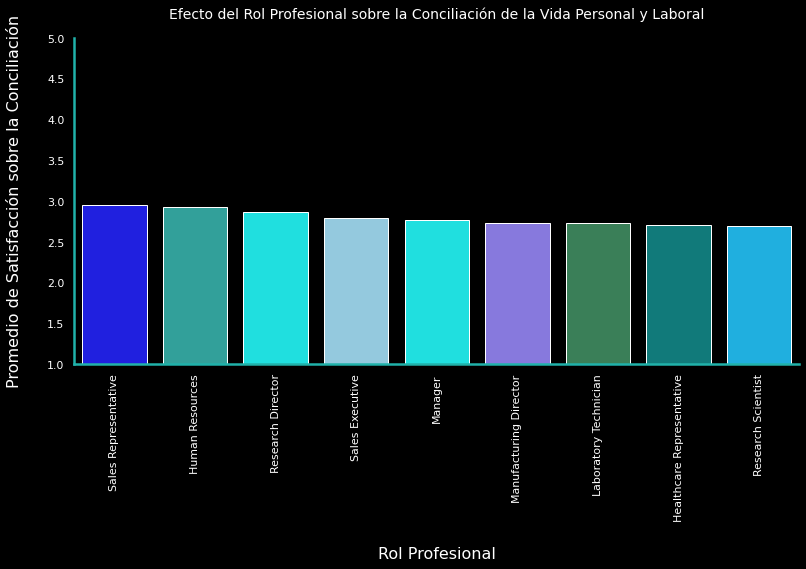

In [41]:
mar_palette = ["blue", "lightseagreen", "aqua", "skyblue", "cyan", "mediumslateblue", "seagreen", "darkcyan", "deepskyblue", "mediumturquoise"]
sns.set_palette(mar_palette)

fig, ax = plt.subplots(figsize=(13, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.barplot(
    x="job_role", 
    y="work_life_balance", 
    data=roles_ordenados, 
    ax=ax,
    order=roles_ordenados["job_role"],
    palette=mar_palette
)

ax.set_ylim(bottom=1, top=5)

ax.set_xlabel("Rol Profesional", fontsize=16, color='white', labelpad=25)
ax.set_ylabel("Promedio de Satisfacción sobre la Conciliación", fontsize=16, color='white', labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.xticks(rotation=90)

ax.grid(False)

ax.set_title('Efecto del Rol Profesional sobre la Conciliación de la Vida Personal y Laboral', fontsize=14, color='white', pad=20)

plt.show()

Se observa que no hay una diferencia antre los diferentes roles profesionales y el promedio de satisfacción entre la conciliación entre la vida personal y laboral.

**3. ¿Número de Empleados que hacen Horas Extra?- Determinar si en la cultura de trabajo de la empresa es trabajar muchas horas extras y si esto afecta la satisfacción del trabajador**

/tmp/ipykernel_21694/1961554850.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Horas Extra', 'Sí Horas Extra'])


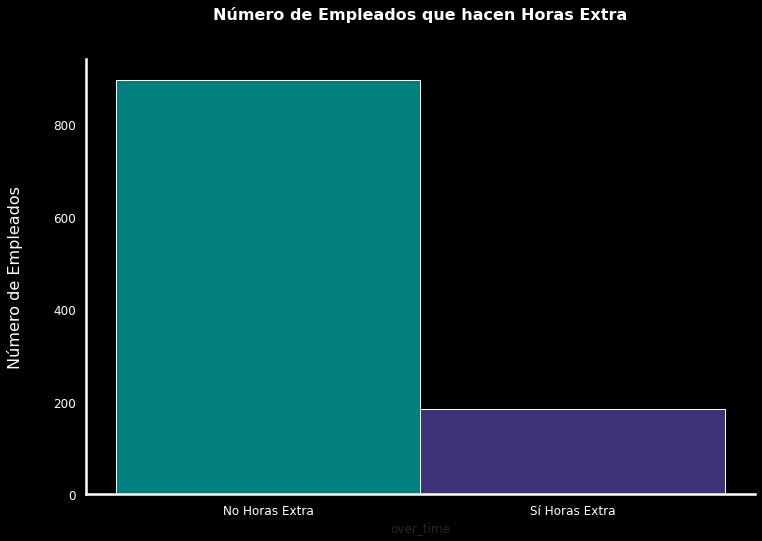

In [42]:
mar_palette = ["aqua", "mediumslateblue"]
sns.set_palette(mar_palette)

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')

sns.histplot(x="over_time", data=df_HR_prueba, ax=ax, hue="over_time", palette=mar_palette, legend=False, kde=False, discrete=True)

ax.set_ylabel("Número de Empleados", fontsize=16, color='white', labelpad=30)        

ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.set_xticklabels(['No Horas Extra', 'Sí Horas Extra'])

ax.grid(False)

plt.title('Número de Empleados que hacen Horas Extra', fontsize=16, color='white', pad=40, loc='center', weight='bold')

plt.show()

Se puede observar que no hay una cultura en la empresa en relación a trabajar horas extra.

**4. Empleados que han tenido alguna Promoción en los últimos años**

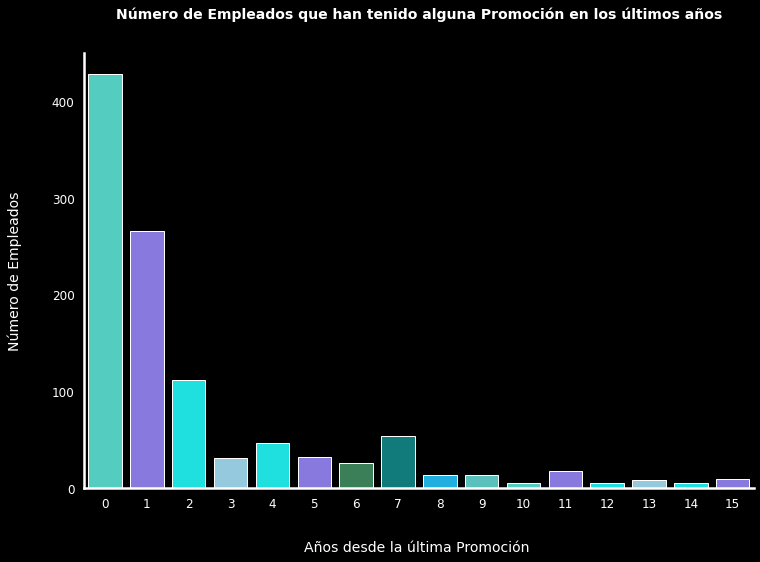

In [44]:
mar_palette = ["turquoise", "mediumslateblue", "aqua", "skyblue", "cyan", "mediumslateblue", "seagreen", "darkcyan", "deepskyblue", "mediumturquoise"]
sns.set_palette(mar_palette)

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')

years_counts = df_HR_prueba["years_since_last_promotion"].value_counts().sort_index()

sns.barplot(x=years_counts.index, y=years_counts.values, ax=ax, palette=mar_palette)

ax.set_xlabel("Años desde la última Promoción ", fontsize=14, color='white', labelpad=30)  
ax.set_ylabel("Número de Empleados", fontsize=14, color='white', labelpad=30)

ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

ax.set_xticks(range(int(df_HR_prueba["years_since_last_promotion"].min()), int(df_HR_prueba["years_since_last_promotion"].max()) + 1))

ax.grid(False)

plt.title('Número de Empleados que han tenido alguna Promoción en los últimos años', fontsize=14, color='white', pad=35, loc='center', weight='bold')

plt.show()

Se puede observar que la mayoría de las promociones ocurren en los primeros 2 años tras una promoción anterior. Conforme pasan los años, la probabilidad de recibir otra promoción disminuye notablemente, y después de los 7 años, las promociones se vuelven poco frecuentes

**5. Relación entre el nivel de satisfacción en el trabajo y conciliación de la vida personal y laboral**

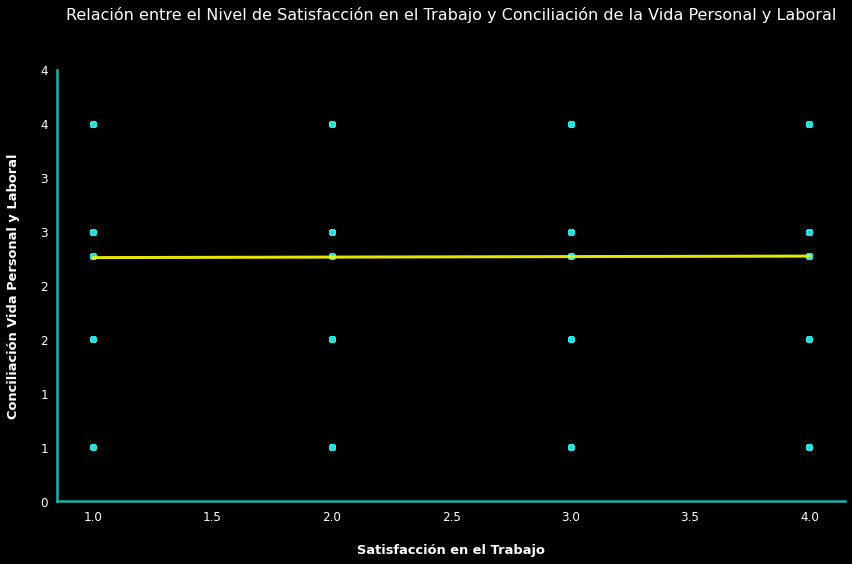

In [46]:
sns.set(style="darkgrid")


fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')

scatter = sns.scatterplot(
    x="job_satisfaction",
    y="work_life_balance",
    sizes=(20, 200),
    color="mediumturquoise",
    alpha=0.9,
    edgecolor="aqua",
    linewidth=0.8,
    data=df_HR_prueba,
    ax=ax,
    legend=False
)

sns.regplot(
    x='job_satisfaction',
    y='work_life_balance',
    scatter=False,
    color='yellow',
    line_kws={"linewidth": 3, 'alpha': 0.9},
    ci=None,
    data=df_HR_prueba,
    ax=ax
)

ax.set_xlabel("Satisfacción en el Trabajo", fontsize=13, color='white', weight='bold', labelpad=20)
ax.set_ylabel("Conciliación Vida Personal y Laboral", fontsize=13, color='white', weight='bold', labelpad=20)

ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

ax.set_yticks(ax.get_yticks())
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Relación entre el Nivel de Satisfacción en el Trabajo y Conciliación de la Vida Personal y Laboral', fontsize=16, color='white', pad=50)

plt.grid(False)

plt.tight_layout()
plt.show()

`Conclusión` no existe relación entre nivel de satisfacción y balance en vida  y personal

**6. Relación entre Formaciones por parte de la Empresa  y la Rotación de los Empleados**

In [18]:
df_attrition = df_HR_prueba.groupby('attrition')['training_times_last_year'].mean().reset_index()
df_attrition

,attrition,training_times_last_year
0,0,2.852713
1,1,2.644068


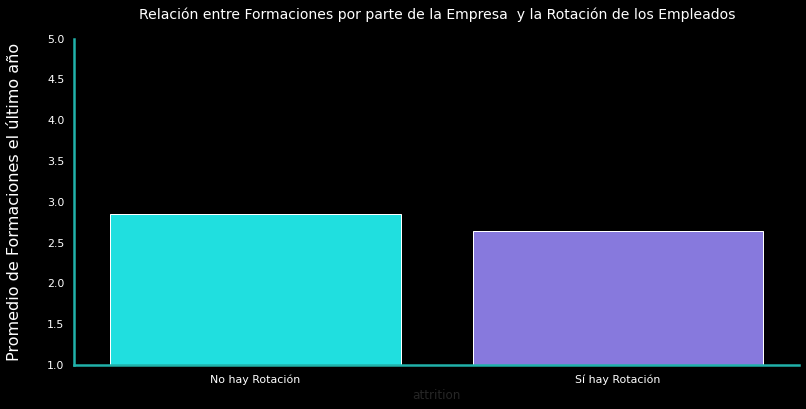

In [53]:
mar_palette = ["aqua", "mediumslateblue"]
sns.set_palette(mar_palette)


fig, ax = plt.subplots(figsize=(13, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.barplot(
    x="attrition", 
    y="training_times_last_year", 
    data=df_attrition, 
    ax=ax,
    palette=mar_palette
)


ax.set_ylim(bottom=1, top=5)


ax.set_ylabel("Promedio de Formaciones el último año", fontsize=16, color='white',labelpad=25)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax. set_xticklabels(['No hay Rotación', 'Sí hay Rotación'])



ax.set_title('Relación entre Formaciones por parte de la Empresa  y la Rotación de los Empleados', fontsize=14, color='white', pad=20)
plt.grid(False)

plt.show()


Conclusiones: Podemos concluir que el numero de empleados que abandonan la empresa es mayor cuando recibe menos formacion, para mitigar este impacto la empresa puede valorar opciones de formación continua y tener motivados a los empleados con su crecimiento en el desempeño del puesto.

**7. Relación entre Nivel de Satisfacción y Salario Promedio**

In [20]:
df_salary= df_HR_prueba.groupby('job_satisfaction')['salary'].mean().round(2).reset_index()
df_salary

,job_satisfaction,salary
0,1,6454.09
1,2,6491.26
2,3,6829.33
3,4,6534.76


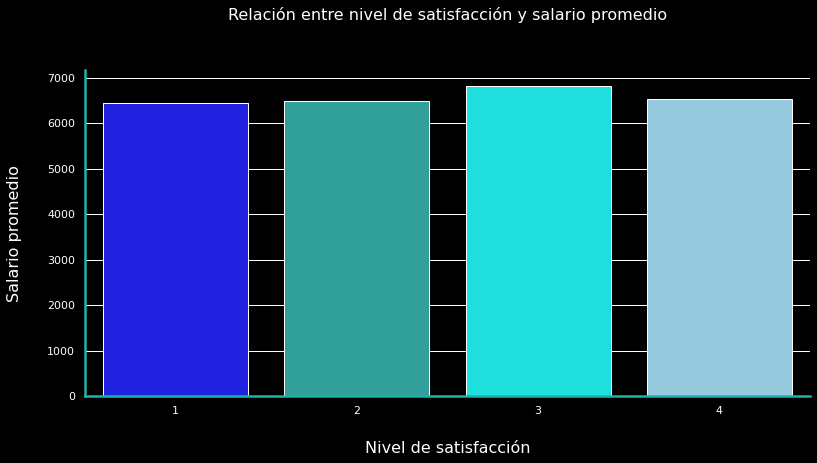

In [22]:
mar_palette = ["blue", "lightseagreen", "aqua", "skyblue"]
sns.set_palette(mar_palette)


fig, ax = plt.subplots(figsize=(13, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.barplot(
    x="job_satisfaction", 
    y="salary", 
    data=df_salary, 
    ax=ax,
    palette=mar_palette
)



ax.set_xlabel("Nivel de satisfacción", fontsize=16, color='white',labelpad=25)
ax.set_ylabel("Salario promedio", fontsize=16, color='white',labelpad=25)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')



plt.title('Relación entre nivel de satisfacción y salario promedio', fontsize=16, color='white', pad=50)

plt.show()

Se puede ver que aunque los empleados tienen niveles de satisfacción por encima del tres, tienen un salario promedio mayor que con empleados con un nivel de satisfacción 1 y 2; no es una diferencia significativa.

8. ¿ Existe una relación entre el nivel del salario y la rotación de empleados?

In [23]:
df_salary_rot= df_HR_prueba.groupby('attrition')['salary'].mean().round(2).reset_index()
df_salary_rot


,attrition,salary
0,0,6959.85
1,1,4746.27


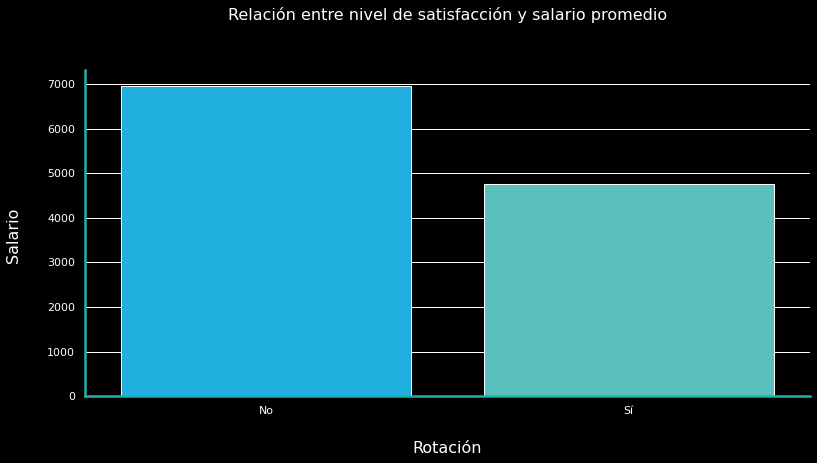

In [25]:
sns.set(style="darkgrid")
mar_palette = ["deepskyblue", "mediumturquoise"]
sns.set_palette(mar_palette)

fig, ax = plt.subplots(figsize=(13, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

sns.barplot(x='attrition', y='salary', data= df_salary_rot, ci=None,  ax=ax,
    palette=mar_palette)
            


ax.set_xlabel("Rotación", fontsize=16, color='white',labelpad=25)
ax.set_ylabel("Salario promedio", fontsize=16, color='white',labelpad=25)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax. set_xticklabels(['No', 'Sí'])


plt.title('Relación entre nivel de satisfacción y salario promedio', fontsize=16, color='white', pad=50)

plt.xlabel('Rotación')
plt.ylabel('Salario ')
plt.show()

`Conclusiones`: Podemos concluir que la rotacion es mucho mayor en aquellos empleados que tienen un salario menor, este resultado puede ayudar a la empresa a valorar politicas retributivas estableciendo planes de incentivos como mejora salarial basados en el cumplimientos de objetivos.

9. Relación entre remote_work y  attrition

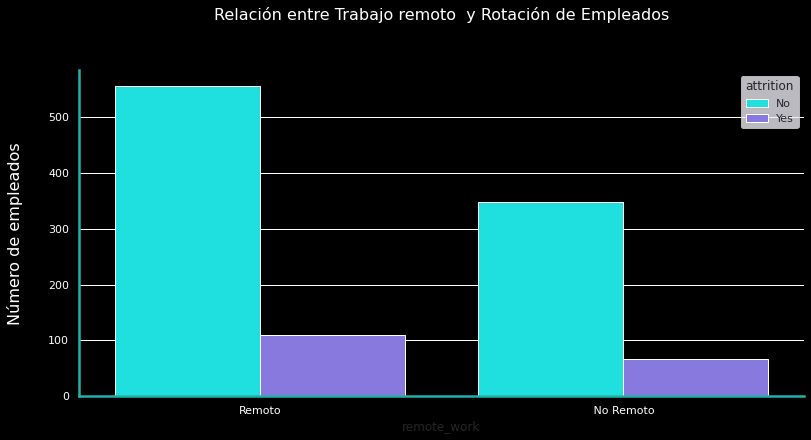

In [41]:
mar_palette = [ "aqua", "mediumslateblue"]
sns.set_palette(mar_palette)


fig, ax = plt.subplots(figsize=(13, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.countplot(
    x="remote_work", 
    hue="attrition", 
    data=df_HR_prueba, 
    ax=ax,
    palette=mar_palette
)




ax.set_ylabel("Número de empleados", fontsize=16, color='white',labelpad=25)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax. set_xticklabels(['Remoto', ' No Remoto'])




plt.title('Relación entre Trabajo remoto  y Rotación de Empleados', fontsize=16, color='white', pad=50)

plt.show()

La gráfica sugiere que los empleados que trabajan de forma remota tienden a quedarse más en la empresa, mientras que los empleados que no tienen la opción de trabajar remotamente parecen tener una tasa de rotación ligeramente mayor. Esto podría indicar que el trabajo remoto está asociado con una menor rotación laboral.

10. ¿Cuál es el promedio de rotación por rango laboral en la empresa?

In [52]:
rotacion_rango = df_HR_prueba.groupby("job_level")["attrition"].mean().reset_index()

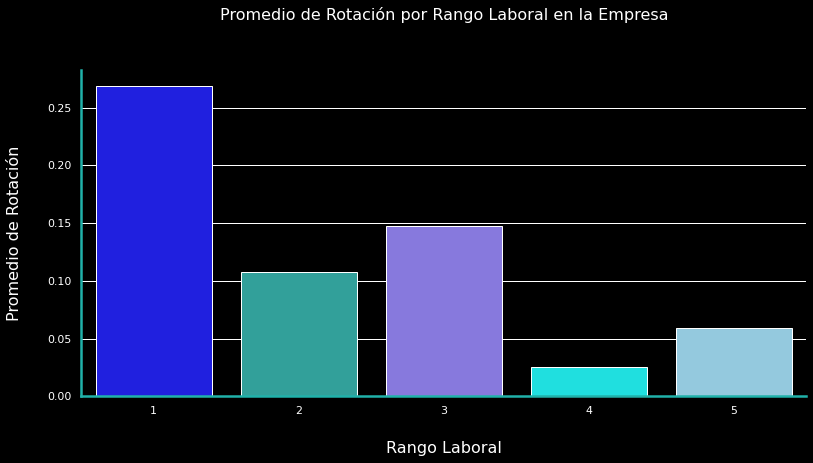

In [53]:
mar_palette = ["blue", "lightseagreen", "mediumslateblue", "aqua", "skyblue", ]
sns.set_palette(mar_palette)


fig, ax = plt.subplots(figsize=(13, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


sns.barplot(
    x="job_level", 
    y="attrition", 
    data=rotacion_rango, 
    ax=ax,
    palette=mar_palette
)



ax.set_xlabel("Rango Laboral", fontsize=16, color='white',labelpad=25)
ax.set_ylabel("Promedio de Rotación", fontsize=16, color='white',labelpad=25)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_color('lightseagreen')
ax.spines['bottom'].set_color('lightseagreen')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')



plt.title('Promedio de Rotación por Rango Laboral en la Empresa', fontsize=16, color='white', pad=50)

plt.show()

Se observa que los empleados que están entre los rangos 1 y 3 tienen un mayor promedio de rotación. 